## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as pd 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:

url = 'https://raw.githubusercontent.com/dp2826562/SMU-June_2021_Bootcamp_Homework/main/21-Deep-Learning/Resources/charity_data.csv'

df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# #  Import and read the charity_data.csv.
# application_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HW 21/Resources/charity_data.gsheet")
# application_df.head()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE

df1 = df1.drop(["EIN", "NAME"], axis = 1)
df1.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HEREI""]
for col in df1.columns: 
  if col not in ["STATUS", "ASK_AMT"]:
    print(col)
    print(len(df1[col].value_counts()))
    print()

APPLICATION_TYPE
17

AFFILIATION
6

CLASSIFICATION
71

USE_CASE
5

ORGANIZATION
4

INCOME_AMT
9

SPECIAL_CONSIDERATIONS
2

IS_SUCCESSFUL
2



In [8]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
df1.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
df1.APPLICATION_TYPE.value_counts() < 500

T3     False
T4     False
T6     False
T5     False
T19    False
T8     False
T7     False
T10    False
T9      True
T13     True
T12     True
T2      True
T14     True
T25     True
T29     True
T15     True
T17     True
Name: APPLICATION_TYPE, dtype: bool

In [10]:
app_values = df1.APPLICATION_TYPE.value_counts() < 500
list(app_values[app_values < 500].index)

['T3',
 'T4',
 'T6',
 'T5',
 'T19',
 'T8',
 'T7',
 'T10',
 'T9',
 'T13',
 'T12',
 'T2',
 'T14',
 'T25',
 'T29',
 'T15',
 'T17']

In [11]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

app_values = df1.APPLICATION_TYPE.value_counts()

cutoff = 500
application_types_to_replace = list(app_values[app_values < cutoff].index)

# Replace in dataframe
for app in application_types_to_replace:
    df1['APPLICATION_TYPE'] = df1['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df1['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

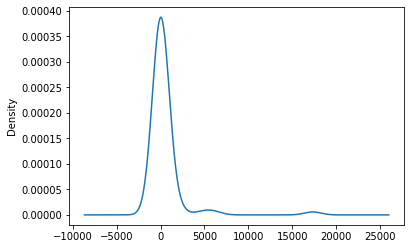

In [12]:
df1.CLASSIFICATION.value_counts().plot.kde()
plt.show()

In [13]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE

class_values = df1.CLASSIFICATION.value_counts()
class_values[class_values > 1]


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C0           3
C2710        3
C1260        3
C3200        2
C1267        2
C1234        2
C1246        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [14]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE

In [15]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

class_values = df1.CLASSIFICATION.value_counts()

cutoff = 300
classifications_to_replace = list(class_values[class_values < cutoff].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df1['CLASSIFICATION'] = df1['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df1['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE

df1 = pd.get_dummies(df1)
df1.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [17]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = df1.drop("IS_SUCCESSFUL", axis=1)
y = df1.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [20]:
X_train_scaled[0:5]

array([[ 0.01394306, -0.03145581, -0.09072362, -0.12439654, -0.17881097,
         0.51956203, -0.21936186, -0.18798319, -0.19215508, -0.14781048,
        -0.14698452,  1.08653319, -0.04413044, -1.07966868, -0.02858365,
        -0.01079982, -0.01649829, -1.00929526,  2.49110462, -0.46559914,
        -0.24404937, -0.24547676, -0.15241362, -0.21115639, -0.1077076 ,
        -0.06401969, -0.00881785,  0.47115253, -0.44619096, -0.65458096,
        -0.11846277, -0.03416998,  0.67806062,  0.63578701, -0.14794773,
        -0.12647487, -0.32795104, -0.08347349, -0.16957078, -0.35060874,
        -0.06493162, -0.07126932,  0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, -0.12439654, -0.17881097,
         0.51956203, -0.21936186, -0.18798319, -0.19215508, -0.14781048,
        -0.14698452, -0.92035845, -0.04413044,  0.92621007, -0.02858365,
        -0.01079982, -0.01649829,  0.99079035, -0.40142834, -0.46559914,
        -0.24404937, -0.24547676, -0.15241362, -0.21115639, -0.

## Compile, Train and Evaluate the Model

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn_model = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn_model.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=len(X.columns)))
# Second hidden layer
#  YOUR CODE GOES HERE

nn_model.add(tf.keras.layers.Dense(units=50, activation="tanh"))

# Third hidden layer
#  YOUR CODE GOES HERE

nn_model.add(tf.keras.layers.Dense(units=25, activation="tanh"))
# Output layer
#  YOUR CODE GOES HERE

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4500      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
#  YOUR CODE GOES HERE
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Train the model

#  YOUR CODE GOES HERE
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=75)



Epoch 1/75
804/804 [==============================] - 3s 3ms/step - loss: 0.5674 - accuracy: 0.7219
Epoch 2/75
804/804 [==============================] - 2s 3ms/step - loss: 0.5541 - accuracy: 0.7264
Epoch 3/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5512 - accuracy: 0.7304
Epoch 4/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5496 - accuracy: 0.7313
Epoch 5/75
804/804 [==============================] - 2s 3ms/step - loss: 0.5487 - accuracy: 0.7311
Epoch 6/75
804/804 [==============================] - 2s 3ms/step - loss: 0.5472 - accuracy: 0.7310
Epoch 7/75
804/804 [==============================] - 2s 3ms/step - loss: 0.5463 - accuracy: 0.7322
Epoch 8/75
804/804 [==============================] - 2s 3ms/step - loss: 0.5455 - accuracy: 0.7319
Epoch 9/75
804/804 [==============================] - 2s 3ms/step - loss: 0.5451 - accuracy: 0.7323
Epoch 10/75
804/804 [==============================] - 2s 3ms/step - loss: 0.5441 - accuracy: 0.7335

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5553 - accuracy: 0.7306 - 473ms/epoch - 2ms/step
Loss: 0.5553303360939026, Accuracy: 0.7306122183799744


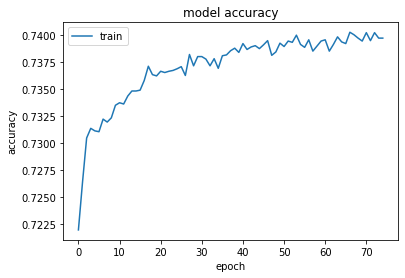

In [25]:
plt.plot(fit_model.history["accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

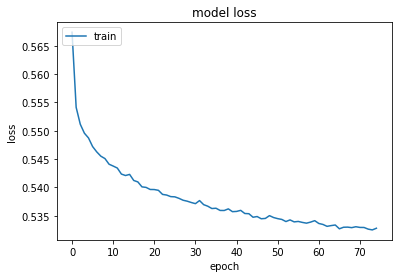

In [26]:
plt.plot(fit_model.history["loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE

nn_model.save("/content/drive/MyDrive/Colab Notebooks/HW 21/model4.h5")





